Cost function Blog -> https://medium.com/@anishnama20/understanding-cost-functions-in-machine-learning-types-and-applications-cd7d8cc4b47d


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

0.6800000000000002


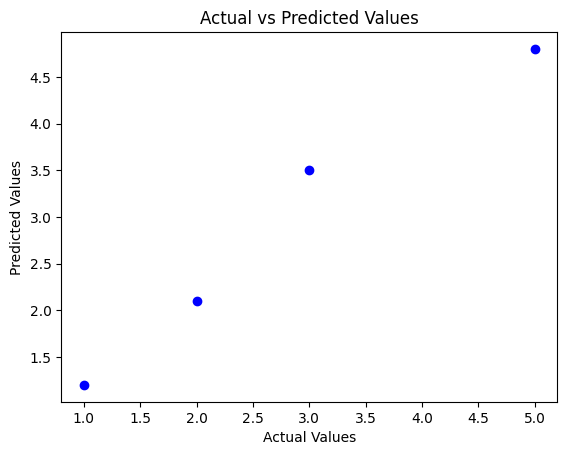

In [6]:
# Cost function (M.S.E)

# Predicted and actual values
y_pred = np.array([1.2, 2.1, 3.5, 4.8])
y_actual = np.array([1, 2, 3, 5])
# Plotting the actual vs predicted values
plt.scatter(y_actual, y_pred, color='blue', label='Predicted vs Actual')
# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
#now we will find m.s.e to plot best fit line
n = len(y_pred)
mse = (1/2*n)*(np.sum((y_actual-y_pred)**2))
print(mse)

Mean Squared Error (MSE): 0.08500000000000002
0.9142857142857141 0.3857142857142849
y_fit [1.3        2.21428571 3.12857143 4.95714286]


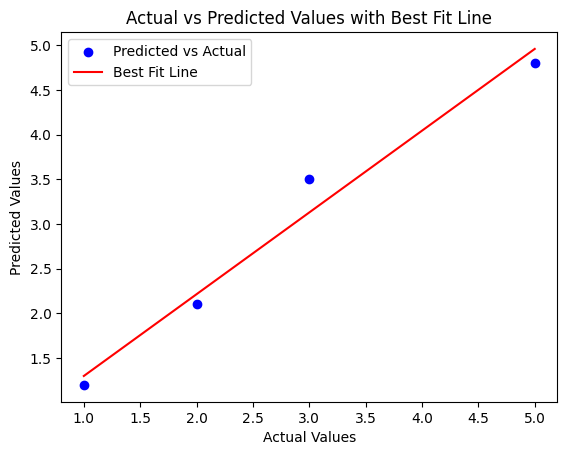

In [7]:
import numpy as np
import matplotlib.pyplot as plt
y_pred = np.array([1.2, 2.1, 3.5, 4.8])
y_actual = np.array([1, 2, 3, 5])
# Step 1: Calculate Mean Squared Error (MSE)
mse = np.mean((y_pred - y_actual)**2)
print(f"Mean Squared Error (MSE): {mse}")
# step 2 and 3 have to study later
# Step 2: Fit a line (Best Fit Line) using np.polyfit (degree 1 for linear fit)
slope, intercept = np.polyfit(y_actual, y_pred, 1)
print(slope,intercept)
# Step 3: Generate the line of best fit
y_fit = slope * y_actual + intercept
print('y_fit',y_fit)
# Plotting the actual vs predicted values
plt.scatter(y_actual, y_pred, color='blue', label='Predicted vs Actual')

# Plotting the best fit line
plt.plot(y_actual, y_fit, color='red', label='Best Fit Line')

# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values with Best Fit Line')

# Display the legend
plt.legend()

# Show the plot
plt.show()


In [8]:
sl ,inte = 0,0
x = np.array([1,2,3])
y = np.array([inte*i for i in x]) #list comprehension
n = len(x)
cf = (1/(2*n))*(np.sum((y-x)**2))
print(cf)

2.333333333333333


In [9]:
df = pd.read_csv('height-weight.csv')

In [10]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [11]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


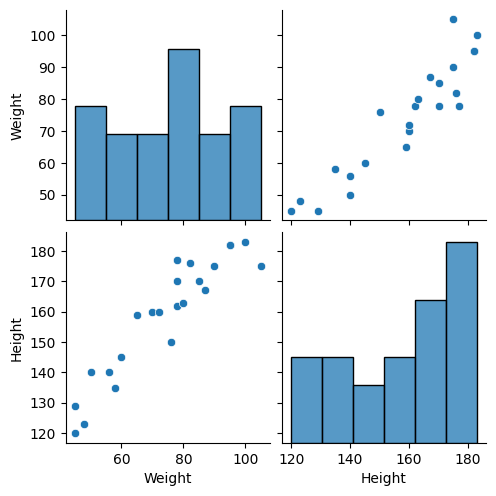

In [12]:
sns.pairplot(df)

Text(0.5, 1.0, 'Scatter plot')

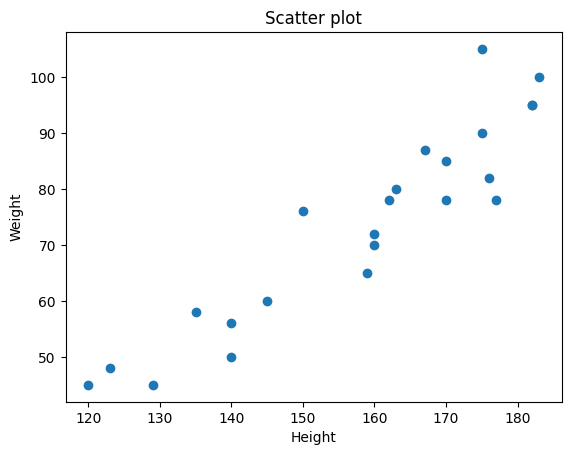

In [13]:
plt.scatter(df['Height'],df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Scatter plot')

In [14]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


This is a regression problem because output value is continuos

In [15]:
# Step:1  Divide dataset into independent and dependent features
X = df[['Weight']] # Independent feature should be in dataframe or 2d array
y = df['Height'] # this can be series or 1d array np.array()

In [22]:
# Step:2 Train test split
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

Step:3  now we will do standerdisation beacasue all the features will be on same scale and All columns have similar value ranges(but it is sensitive to outliers)

e.g 

Age (scaled)	Salary (scaled)

-1.22	&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; -1.00

0.00	&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.00

1.22	&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.00

isme almost sbhi same scale par hai agar koi bada chota hota to machine would have considered that this particular feature is more important

agar ye nhi krege to sab kuch bigger value k sath hoga which is not a good solution as it will take more time to reach global minima



fit_transform vs transform vs fit

fit_transform me data usi particular ka calculate hota hai and transform me dono ka.agar hum fit_transform krte hai test me to model will know about our test info that we don't want to leek that's why we used transform so that it will use train ka mean /std.

fit -> calc. mean and std  and see pattern

transform -> jo fit se sikha use apply 

fit_transform -> fit + transform



In [27]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train) # on train data
X_test = scaler.transform(X_test)



In [29]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [35]:
# step:4 Apply linear regression model
from sklearn.linear_model import LinearRegression

In [44]:
regressor = LinearRegression(n_jobs=-1) #-1 means using all processors

In [45]:
regressor.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [ ]:
print('cofficient/slope: ',regressor.coef_)
print('INTERCEPT: ',regressor.intercept_)
# print('INTERCEPT: ',regressor.n_features_in_)

cofficient/slope:  [17.2982057]
INTERCEPT:  156.47058823529412
INTERCEPT:  1


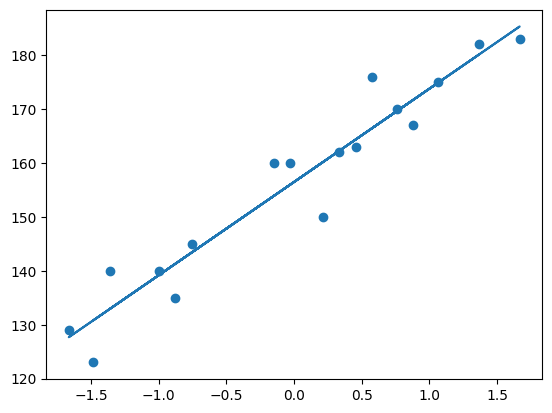

In [55]:
# step:5 Training data plot for best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train))